#### Imports

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Explore and analyze data

In [2]:
# Read the data
X_Train = pd.read_csv('./train.csv')
X_Test  = pd.read_csv('./test.csv')

# # Remove rows with missing target, separate target from predictors
# X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
# y = X_full.SalePrice
# X_full.drop(['SalePrice'], axis=1, inplace=True)


In [3]:
X_Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### How many features have null values

In [4]:
num_null_cols = [i for i in X_Train.columns if X_Train[i].isnull().any()]
print(f"Number of features have null values: {len(num_null_cols)}")
print()

print("Each feature with the corresponding null value count")
X_Train.isnull().sum()

Number of features have null values: 19

Each feature with the corresponding null value count


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
Target = 'SalePrice'

#### Checking the type of the null values

In [6]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']

# prints number of null values detected by .isnull() and string none
for c in X_Train.columns:
    string_null = np.array([x in a[2:] for x in X_Train[c]])
    print(c, X_Train[c].isnull().sum(), string_null.sum()) 

Id 0 0
MSSubClass 0 0
MSZoning 0 0
LotFrontage 259 0
LotArea 0 0
Street 0 0
Alley 1369 0
LotShape 0 0
LandContour 0 0
Utilities 0 0
LotConfig 0 0
LandSlope 0 0
Neighborhood 0 0
Condition1 0 0
Condition2 0 0
BldgType 0 0
HouseStyle 0 0
OverallQual 0 0
OverallCond 0 0
YearBuilt 0 0
YearRemodAdd 0 0
RoofStyle 0 0
RoofMatl 0 0
Exterior1st 0 0
Exterior2nd 0 0
MasVnrType 8 864
MasVnrArea 8 0
ExterQual 0 0
ExterCond 0 0
Foundation 0 0
BsmtQual 37 0
BsmtCond 37 0
BsmtExposure 38 0
BsmtFinType1 37 0
BsmtFinSF1 0 0
BsmtFinType2 38 0
BsmtFinSF2 0 0
BsmtUnfSF 0 0
TotalBsmtSF 0 0
Heating 0 0
HeatingQC 0 0
CentralAir 0 0
Electrical 1 0
1stFlrSF 0 0
2ndFlrSF 0 0
LowQualFinSF 0 0
GrLivArea 0 0
BsmtFullBath 0 0
BsmtHalfBath 0 0
FullBath 0 0
HalfBath 0 0
BedroomAbvGr 0 0
KitchenAbvGr 0 0
KitchenQual 0 0
TotRmsAbvGrd 0 0
Functional 0 0
Fireplaces 0 0
FireplaceQu 690 0
GarageType 81 0
GarageYrBlt 81 0
GarageFinish 81 0
GarageCars 0 0
GarageArea 0 0
GarageQual 81 0
GarageCond 81 0
PavedDrive 0 0
WoodDeckSF

#### Draw a hist for the data

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

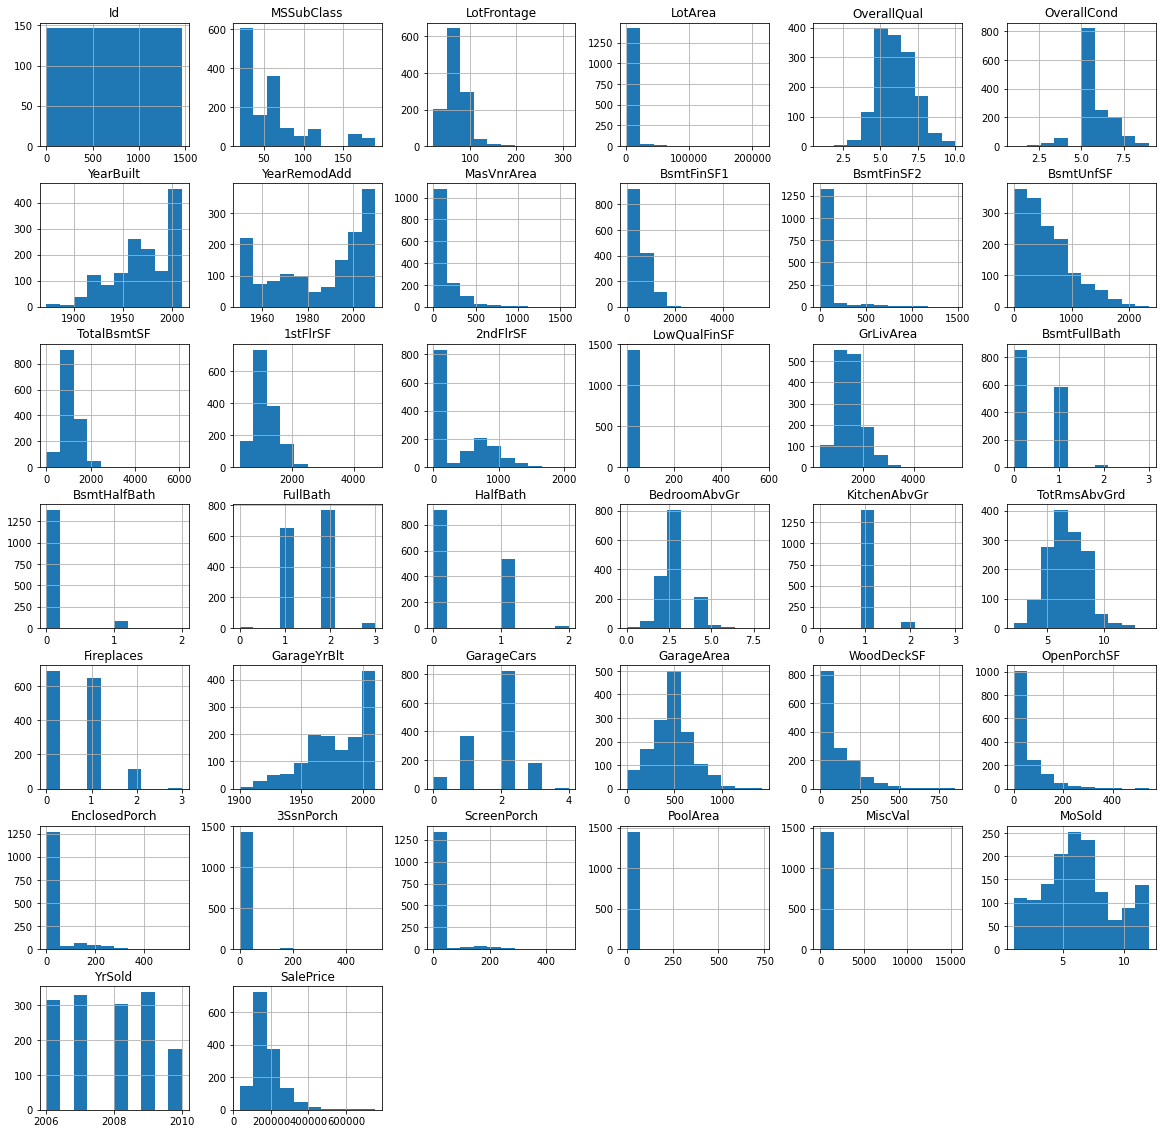

In [7]:
X_Train.hist(figsize=(20,20))

In [8]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Impute missing values

In [9]:
percent_missing = X_Train.isnull().sum() * 100 / len(X_Train)
missing_value_df = pd.DataFrame({'column_name': X_Train.columns,
                                 'percent_missing': percent_missing})

impute_lst = []
throw_lst = []
for i in range(0, len(missing_value_df['percent_missing'])):
    if missing_value_df['percent_missing'][i] <= 5 and missing_value_df['percent_missing'][i] > 0:
        impute_lst.append(missing_value_df['column_name'][i])
    elif missing_value_df['percent_missing'][i] > 5:
        throw_lst.append(missing_value_df['column_name'][i])        

    
# Complete the codes below by uncommenting and changing the values of features_to_impute and features_to_throw. 
# Each should be a list of feature names (e.g. ['LotFrontage','Alley',...]). Do not change the variable names. 
# There are hidden tests which will grade above three questions.

features_to_impute = impute_lst
features_to_throw = throw_lst

print("Features to Impute: ")
print(len(features_to_impute), features_to_impute)
print()
print("Features to Throw: ")
print(len(features_to_throw), features_to_throw)

Features to Impute: 
8 ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']

Features to Throw: 
11 ['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [10]:
X_Train.drop(features_to_throw, axis=1, inplace=True)
X_Train.drop('Id', axis=1, inplace=True)

In [11]:
X_Train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
print(f"Num of features lift: {X_Train.shape[1]}")

Num of features lift: 69


In [13]:
MasVnrArea_median=X_Train['MasVnrArea'].median()
X_Train['MasVnrArea']=X_Train['MasVnrArea'].fillna(MasVnrArea_median)

MasVnrType_mode=X_Train['MasVnrType'].mode()[0]
X_Train['MasVnrType']=X_Train['MasVnrType'].fillna(MasVnrType_mode)


######## 'BsmtQual' and 'BsmtCond' #############
BsmtQual_mode=X_Train['BsmtQual'].mode()[0]
X_Train['BsmtQual']=X_Train['BsmtQual'].fillna(BsmtQual_mode)

BsmtCond_mode=X_Train['BsmtCond'].mode()[0]
X_Train['BsmtCond']=X_Train['BsmtCond'].fillna(BsmtCond_mode)

######## 'BsmtExposure' and 'BsmtFinType1' #############
BsmtExposure_mode=X_Train['BsmtExposure'].mode()[0]
X_Train['BsmtExposure']=X_Train['BsmtExposure'].fillna(BsmtExposure_mode)

BsmtFinType1_mode=X_Train['BsmtFinType1'].mode()[0]
X_Train['BsmtFinType1']=X_Train['BsmtFinType1'].fillna(BsmtFinType1_mode)

######## 'BsmtFinType2' and 'Electrical' #############
BsmtFinType2_mode=X_Train['BsmtFinType2'].mode()[0]
X_Train['BsmtFinType2']=X_Train['BsmtFinType2'].fillna(BsmtFinType2_mode)

Electrical_mode=X_Train['Electrical'].mode()[0]
X_Train['Electrical']=X_Train['Electrical'].fillna(Electrical_mode)

X_Train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
print(f"Num of features lift: {X_Train.shape[1]}")
print(X_Train.isnull().sum())
print("\nAwesome!!")

Num of features lift: 69
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 69, dtype: int64

Awesome!!


## Do same Imputing but for the test set

In [15]:
percent_missing_test = X_Test.isnull().sum() * 100 / len(X_Test)
missing_value_df_test = pd.DataFrame({'column_name': X_Test.columns,
                                 'percent_missing': percent_missing_test})

impute_lst_2 = []
throw_lst_2 = []
for i in range(0, len(missing_value_df_test['percent_missing'])):
    if missing_value_df_test['percent_missing'][i] <= 5 and missing_value_df_test['percent_missing'][i] > 0:
        impute_lst_2.append(missing_value_df_test['column_name'][i])
    elif missing_value_df_test['percent_missing'][i] > 5:
        throw_lst_2.append(missing_value_df_test['column_name'][i])        


features_to_impute_test = impute_lst_2
features_to_throw_test = throw_lst_2

print("Features to Impute: ")
print(len(features_to_impute_test), features_to_impute_test)
print()
print("Features to Throw: ")
print(len(features_to_throw_test), features_to_throw_test)

Features to Impute: 
22 ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']

Features to Throw: 
11 ['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [16]:
X_Test.drop(features_to_throw_test, axis=1, inplace=True)
X_Test.drop('Id', axis=1, inplace=True)

print(f"Num of features lift: {X_Test.shape[1]}")

Num of features lift: 68


#### Whether to use mean(Symmetric) or median(Skewed)

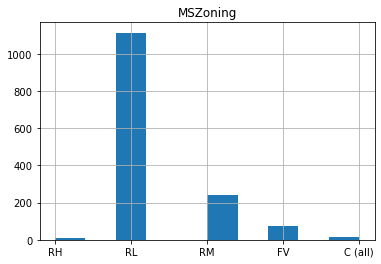

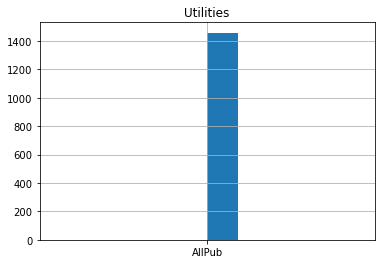

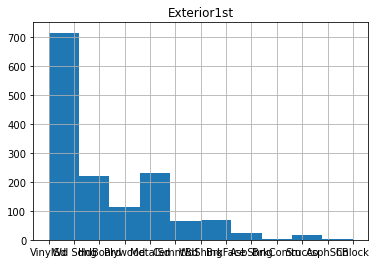

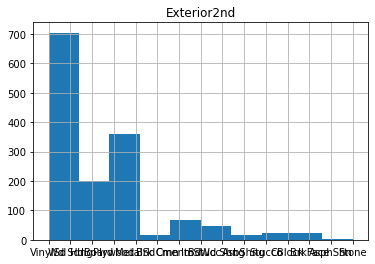

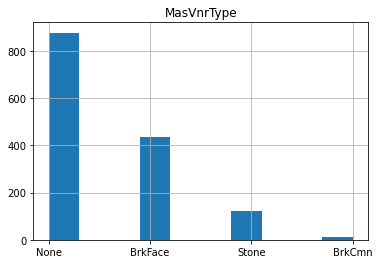

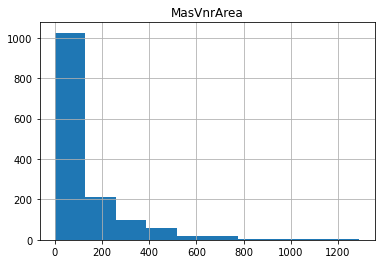

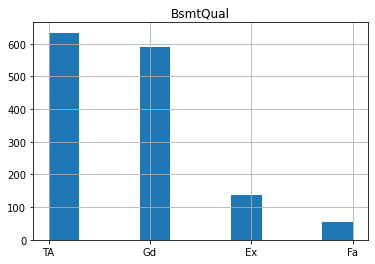

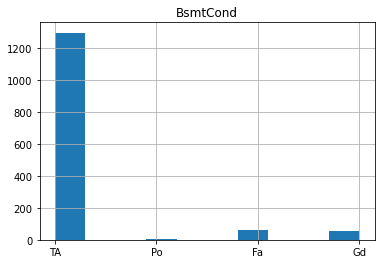

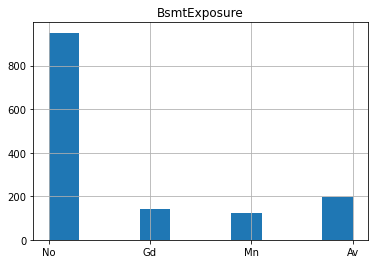

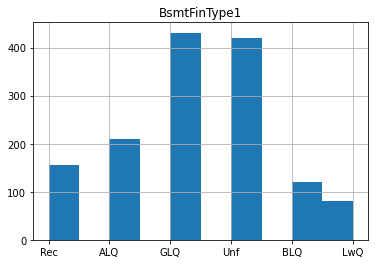

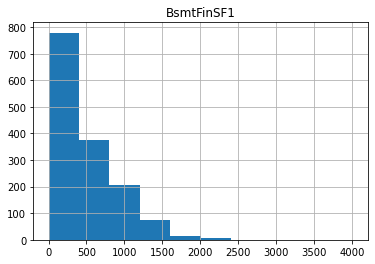

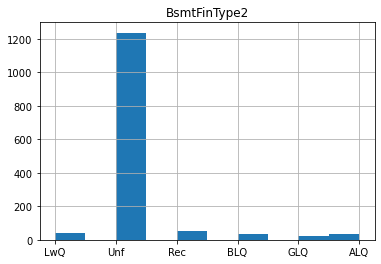

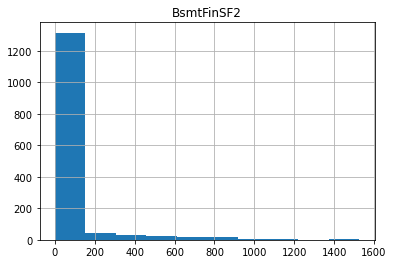

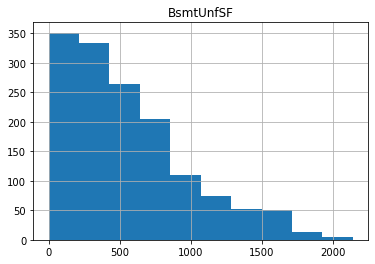

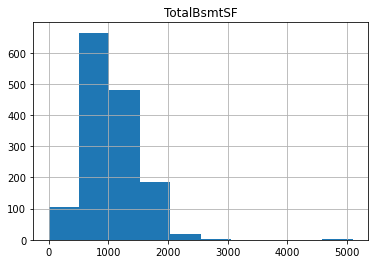

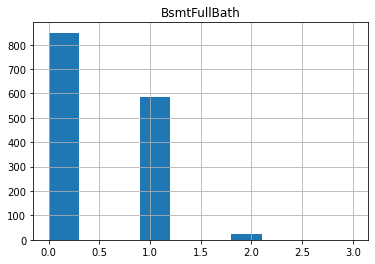

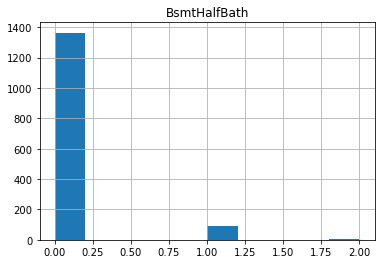

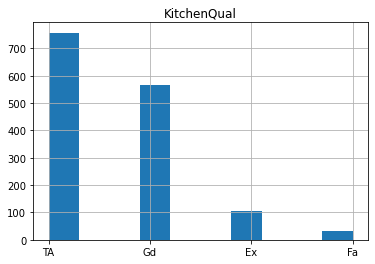

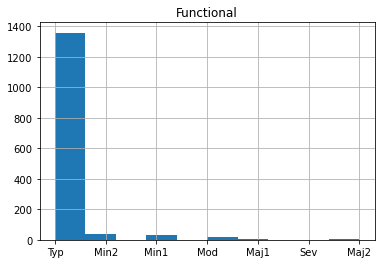

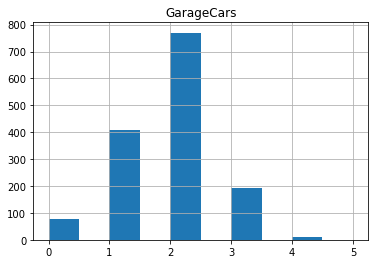

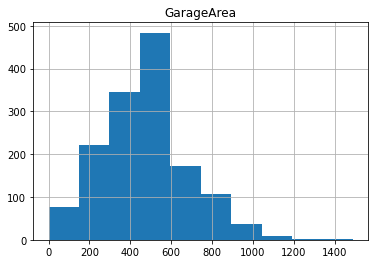

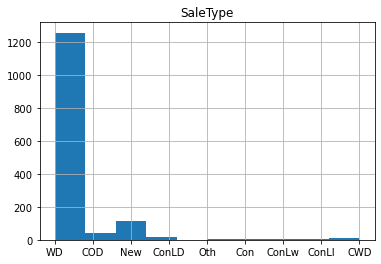

In [17]:
for c in features_to_impute_test:
    X_Test[c].hist()
    plt.title(c)
    plt.show()

In [18]:
for c in features_to_impute_test:
    print(c, len(X_Test[c].unique()), X_Test[c].dtype)

MSZoning 6 object
Utilities 2 object
Exterior1st 14 object
Exterior2nd 16 object
MasVnrType 5 object
MasVnrArea 304 float64
BsmtQual 5 object
BsmtCond 5 object
BsmtExposure 5 object
BsmtFinType1 7 object
BsmtFinSF1 670 float64
BsmtFinType2 7 object
BsmtFinSF2 162 float64
BsmtUnfSF 794 float64
TotalBsmtSF 737 float64
BsmtFullBath 5 float64
BsmtHalfBath 4 float64
KitchenQual 5 object
Functional 8 object
GarageCars 7 float64
GarageArea 460 float64
SaleType 10 object


In [19]:
MasVnrArea_median_test=X_Test['MasVnrArea'].median()
X_Test['MasVnrArea']=X_Test['MasVnrArea'].fillna(MasVnrArea_median_test)

MasVnrType_mode_test=X_Test['MasVnrType'].mode()[0]
X_Test['MasVnrType']=X_Test['MasVnrType'].fillna(MasVnrType_mode_test)

MSZoning_mode_test=X_Test['MSZoning'].mode()[0]
X_Test['MSZoning']=X_Test['MSZoning'].fillna(MSZoning_mode_test)

Utilities_mode_test=X_Test['Utilities'].mode()[0]
X_Test['Utilities']=X_Test['Utilities'].fillna(Utilities_mode_test)

Exterior1st_mode_test=X_Test['Exterior1st'].mode()[0]
X_Test['Exterior1st']=X_Test['Exterior1st'].fillna(Exterior1st_mode_test)

Exterior2nd_mode_test=X_Test['Exterior2nd'].mode()[0]
X_Test['Exterior2nd']=X_Test['Exterior2nd'].fillna(Exterior2nd_mode_test)

BsmtFinSF1_median_test=X_Test['BsmtFinSF1'].median()
X_Test['BsmtFinSF1']=X_Test['BsmtFinSF1'].fillna(BsmtFinSF1_median_test)

BsmtFinSF2_median_test=X_Test['BsmtFinSF2'].median()
X_Test['BsmtFinSF2']=X_Test['BsmtFinSF2'].fillna(BsmtFinSF2_median_test)

BsmtUnfSF_median_test=X_Test['BsmtUnfSF'].median()
X_Test['BsmtUnfSF']=X_Test['BsmtUnfSF'].fillna(BsmtUnfSF_median_test)

TotalBsmtSF_median_test=X_Test['TotalBsmtSF'].median()
X_Test['TotalBsmtSF']=X_Test['TotalBsmtSF'].fillna(TotalBsmtSF_median_test)

TotalBsmtSF_median_test=X_Test['TotalBsmtSF'].median()
X_Test['TotalBsmtSF']=X_Test['TotalBsmtSF'].fillna(TotalBsmtSF_median_test)

BsmtFullBath_mode_test=X_Test['BsmtFullBath'].mode()[0]
X_Test['BsmtFullBath']=X_Test['BsmtFullBath'].fillna(BsmtFullBath_mode_test)

BsmtHalfBath_mode_test=X_Test['BsmtHalfBath'].mode()[0]
X_Test['BsmtHalfBath']=X_Test['BsmtHalfBath'].fillna(BsmtHalfBath_mode_test)

KitchenQual_mode_test=X_Test['KitchenQual'].mode()[0]
X_Test['KitchenQual']=X_Test['KitchenQual'].fillna(KitchenQual_mode_test)

Functional_mode_test=X_Test['Functional'].mode()[0]
X_Test['Functional']=X_Test['Functional'].fillna(Functional_mode_test)

GarageCars_mode_test=X_Test['GarageCars'].mode()[0]
X_Test['GarageCars']=X_Test['GarageCars'].fillna(GarageCars_mode_test)

GarageArea_mean_test=X_Test['GarageArea'].mean()
X_Test['GarageArea']=X_Test['GarageArea'].fillna(GarageArea_mean_test)

SaleType_mode_test=X_Test['SaleType'].mode()[0]
X_Test['SaleType']=X_Test['SaleType'].fillna(SaleType_mode_test)

BsmtQual_mode_test=X_Test['BsmtQual'].mode()[0]
X_Test['BsmtQual']=X_Test['BsmtQual'].fillna(BsmtQual_mode_test)

BsmtCond_mode_test=X_Test['BsmtCond'].mode()[0]
X_Test['BsmtCond']=X_Test['BsmtCond'].fillna(BsmtCond_mode_test)

BsmtExposure_mode_test=X_Test['BsmtExposure'].mode()[0]
X_Test['BsmtExposure']=X_Test['BsmtExposure'].fillna(BsmtExposure_mode_test)

BsmtFinType1_mode_test=X_Test['BsmtFinType1'].mode()[0]
X_Test['BsmtFinType1']=X_Test['BsmtFinType1'].fillna(BsmtFinType1_mode_test)

BsmtFinType2_mode_test=X_Test['BsmtFinType2'].mode()[0]
X_Test['BsmtFinType2']=X_Test['BsmtFinType2'].fillna(BsmtFinType2_mode_test)


X_Test.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


In [20]:
print(f"Num of features lift: {X_Test.shape[1]}")
print(X_Test.isnull().sum())
print("\nAwesome!!!!")

Num of features lift: 68
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 68, dtype: int64

Awesome!!!!


## Encode Categorical Features

In [21]:
cat_lst = []
for c in X_Test:
    if X_Test[c].dtype == 'object': 
        cat_lst.append(c)
        
print(cat_lst)
print()
print(f"Num of Categorical Features to encode: {len(cat_lst)}")

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Num of Categorical Features to encode: 34


##### This function concatenate both train and test dataframe to unify the categorical features value counts

<small>Note that the Function implementation is inspired by krishnaik06</small>

In [22]:
def onehot_encoding_categorical_concat(multcolumns):
    df_final = final_df
    i = 0
    
    for fields in multcolumns:
        print(fields)
        
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        
        if i==0:
            df_final=df1.copy()
        else: 
            df_final=pd.concat([df_final,df1],axis=1)
            
        i=i+1

    df_final=pd.concat([final_df,df_final],axis=1)
    
    return df_final

In [23]:
print(f"Train Data Shape : {X_Train.shape}", f"\nTest Data Shape  : {X_Test.shape}")

Train Data Shape : (1460, 69) 
Test Data Shape  : (1459, 68)


#### Concat Train and Test data frames

In [24]:
final_df = pd.concat([X_Train, X_Test], axis=0)

In [25]:
final_df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [26]:
final_df.shape

(2919, 69)

In [27]:
final_df = onehot_encoding_categorical_concat(cat_lst)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [28]:
print(final_df.shape)
print("\nNow we one hot encoded the entire dataframe 'train + test' 😉")
final_df.head()

(2919, 216)

Now we one hot encoded the entire dataframe 'train + test' 😉


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,1,0,0,0,1,0


Finally Remove all the duplicate columns !

In [29]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]
print(final_df.shape)
final_df.head(10)

(2919, 169)


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,1,0,0,0,1,0
5,50,14115,5,5,1993,1995,0.0,732.0,0.0,64.0,...,0,0,0,0,1,0,0,0,1,0
6,20,10084,8,5,2004,2005,186.0,1369.0,0.0,317.0,...,0,0,0,0,1,0,0,0,1,0
7,60,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,...,0,0,0,0,1,0,0,0,1,0
8,50,6120,7,5,1931,1950,0.0,0.0,0.0,952.0,...,0,0,0,0,1,0,0,0,0,0
9,190,7420,5,6,1939,1950,0.0,851.0,0.0,140.0,...,0,0,0,0,1,0,0,0,1,0


#### Now spliting the final_df back again into train and test 

In [30]:
# Take the original first 1460 rows into the training dataframe -> remainig to test
X_Train_df = final_df.iloc[     : 1460 , : ]
X_Test_df  = final_df.iloc[1460 :      , : ]

In [31]:
# Note that after concatination, the sale price must be dropped from the test df
print("Before Drop: ")
print(X_Test_df.shape)
X_Test_df.drop(['SalePrice'], inplace=True, axis=1)
print("After Drop: ")
X_Test_df.shape

Before Drop: 
(1459, 169)
After Drop: 


/var/folders/pt/jyznl8l11dnchkwt6_m3kqy80000gn/T/ipykernel_17920/2580539673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Test_df.drop(['SalePrice'], inplace=True, axis=1)


(1459, 168)

#### Split Train Df into training features and labels

In [32]:
x = X_Train_df.drop(['SalePrice'], axis=1)
y = X_Train_df['SalePrice']

In [33]:
x.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,1,0,0,0,1,0
5,50,14115,5,5,1993,1995,0.0,732.0,0.0,64.0,...,0,0,0,0,1,0,0,0,1,0
6,20,10084,8,5,2004,2005,186.0,1369.0,0.0,317.0,...,0,0,0,0,1,0,0,0,1,0
7,60,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,...,0,0,0,0,1,0,0,0,1,0
8,50,6120,7,5,1931,1950,0.0,0.0,0.0,952.0,...,0,0,0,0,1,0,0,0,0,0
9,190,7420,5,6,1939,1950,0.0,851.0,0.0,140.0,...,0,0,0,0,1,0,0,0,1,0


## Evaluation Models

#### XGBRegressor

In [34]:
import xgboost
classifier=xgboost.XGBRegressor()

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [35]:
import xgboost
regressor = xgboost.XGBRegressor()


In [36]:
from sklearn.model_selection import RandomizedSearchCV

Note that I will have 2 * 5 = 10 different models 

In [63]:
## Hyper Parameter to loop over
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.1, 0.2]

hyperparameters = {
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    }

In [64]:
# Set up the random search with 4-fold cross validation
random_search_cv = RandomizedSearchCV(
                        estimator=regressor,
                        param_distributions=hyperparameters,
                        cv=5,
                        n_iter=100,
                        scoring = 'neg_mean_absolute_error',
                        n_jobs = 4,
                        verbose = 5, 
                        return_train_score = True,
                        random_state=42)

In [65]:
random_search_cv.fit(x, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/omarmarie/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index wi

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is de

[CV 3/5] END learning_rate=0.1, max_depth=2;, score=(train=-6514.142, test=-15540.601) total time=   6.2s
[CV 2/5] END learning_rate=0.1, max_depth=3;, score=(train=-3003.604, test=-15932.906) total time=   8.7s
[CV 5/5] END learning_rate=0.1, max_depth=3;, score=(train=-3074.931, test=-16038.340) total time=   8.7s
[CV 4/5] END learning_rate=0.1, max_depth=5;, score=(train=-230.813, test=-14344.460) total time=  15.4s
[CV 3/5] END learning_rate=0.1, max_depth=10;, score=(train=-0.098, test=-18255.482) total time=  34.8s
[CV 2/5] END learning_rate=0.1, max_depth=15;, score=(train=-7.184, test=-16909.333) total time=  48.1s


/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a futur

[CV 1/5] END learning_rate=0.1, max_depth=2;, score=(train=-6996.014, test=-14461.391) total time=   6.2s
[CV 1/5] END learning_rate=0.1, max_depth=3;, score=(train=-3351.376, test=-14949.105) total time=   9.0s
[CV 1/5] END learning_rate=0.1, max_depth=5;, score=(train=-235.224, test=-15654.051) total time=  16.8s
[CV 5/5] END learning_rate=0.1, max_depth=5;, score=(train=-239.810, test=-15982.798) total time=  13.7s
[CV 4/5] END learning_rate=0.1, max_depth=10;, score=(train=-7.206, test=-16323.037) total time=  34.1s
[CV 3/5] END learning_rate=0.1, max_depth=15;, score=(train=-0.066, test=-18262.820) total time=  54.7s


/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be

[CV 4/5] END learning_rate=0.1, max_depth=2;, score=(train=-7127.064, test=-13721.379) total time=   6.3s
[CV 3/5] END learning_rate=0.1, max_depth=3;, score=(train=-2804.442, test=-16252.735) total time=   9.0s
[CV 2/5] END learning_rate=0.1, max_depth=5;, score=(train=-200.552, test=-16633.161) total time=  16.8s
[CV 1/5] END learning_rate=0.1, max_depth=10;, score=(train=-7.202, test=-16796.767) total time=  34.1s
[CV 5/5] END learning_rate=0.1, max_depth=10;, score=(train=-0.104, test=-17181.321) total time=  32.2s
[CV 4/5] END learning_rate=0.1, max_depth=15;, score=(train=-7.176, test=-16646.016) total time=  49.6s


/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is d

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.1, max_depth=2;, score=(train=-6957.267, test=-16412.174) total time=   6.1s
[CV 5/5] END learning_rate=0.1, max_depth=2;, score=(train=-6573.913, test=-15812.553) total time=   6.4s
[CV 4/5] END learning_rate=0.1, max_depth=3;, score=(train=-3224.609, test=-14060.793) total time=   9.0s
[CV 3/5] END learning_rate=0.1, max_depth=5;, score=(train=-182.219, test=-16789.846) total time=  16.0s
[CV 2/5] END learning_rate=0.1, max_depth=10;, score=(train=-7.197, test=-16663.414) total time=  34.8s
[CV 1/5] END learning_rate=0.1, max_depth=15;, score=(train=-7.193, test=-17091.689) total time=  48.1s
[CV 5/5] END learning_rate=0.1, max_depth=15;, score=(train=-0.076, test=-17611.735) total time=  49.8s
[CV 4/5] END learning_rate=0.2, max_depth=5;, score=(train=-13.226, test=-15364.374) total time=  16.2s
[CV 3/5] END learning_rate=0.2, max_depth=10;, score=(train=-0.044, test=-18630.432) total time=  32.7s


/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be

[CV 3/5] END learning_rate=0.2, max_depth=3;, score=(train=-962.766, test=-17099.152) total time=   9.1s
[CV 2/5] END learning_rate=0.2, max_depth=5;, score=(train=-12.988, test=-17225.060) total time=  15.8s
[CV 1/5] END learning_rate=0.2, max_depth=10;, score=(train=-7.145, test=-17199.535) total time=  34.2s
[CV 5/5] END learning_rate=0.2, max_depth=10;, score=(train=-0.029, test=-18247.585) total time=  31.7s
[CV 4/5] END learning_rate=0.2, max_depth=15;, score=(train=-7.133, test=-16841.057) total time=  38.1s


/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.2, max_depth=2;, score=(train=-4293.798, test=-14886.109) total time=   5.6s
[CV 2/5] END learning_rate=0.2, max_depth=2;, score=(train=-4299.855, test=-17477.575) total time=   5.2s
[CV 3/5] END learning_rate=0.2, max_depth=2;, score=(train=-4062.657, test=-16780.359) total time=   4.9s
[CV 5/5] END learning_rate=0.2, max_depth=2;, score=(train=-4120.036, test=-17471.398) total time=   5.6s
[CV 2/5] END learning_rate=0.2, max_depth=3;, score=(train=-905.944, test=-17498.443) total time=   8.3s
[CV 5/5] END learning_rate=0.2, max_depth=3;, score=(train=-1064.972, test=-16868.555) total time=   8.7s
[CV 3/5] END learning_rate=0.2, max_depth=5;, score=(train=-7.680, test=-17342.626) total time=  16.1s
[CV 2/5] END learning_rate=0.2, max_depth=10;, score=(train=-7.138, test=-18358.735) total time=  40.7s
[CV 2/5] END learning_rate=0.2, max_depth=15;, score=(train=-7.133, test=-18257.120) total time=  44.0s
[CV 5/5] END learning_rate=0.2, max_depth=15;, score=(

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.25, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=2, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=900,...obs=8,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg

In [66]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [67]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=np.nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [68]:
regressor.fit(x,y)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [69]:
random_search_cv.cv_results_

{'mean_fit_time': array([ 6.22437549,  8.88702469, 15.71535592, 34.00913424, 50.05568399,
         5.30322571,  8.58482394, 15.76516089, 33.49504561, 39.52638564]),
 'std_fit_time': array([ 0.12908142,  0.14056686,  1.14868905,  0.94742837,  2.44930828,
         0.25519761,  0.46063995,  0.39100445,  4.12683513, 11.07921623]),
 'mean_score_time': array([0.00706601, 0.00778661, 0.00875163, 0.01176171, 0.01581273,
        0.00711145, 0.00855064, 0.01112647, 0.01195159, 0.01453419]),
 'std_score_time': array([0.00032006, 0.0003664 , 0.00054169, 0.00106276, 0.00048028,
        0.00026113, 0.00197613, 0.00473076, 0.00042453, 0.00198117]),
 'param_max_depth': masked_array(data=[2, 3, 5, 10, 15, 2, 3, 5, 10, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2],
              mask=[False, 

In [70]:
regressor.score(x, y)

0.9827599510478134

In [72]:
model_scores = random_search_cv.cv_results_['mean_test_score']

In [73]:
model_scores

array([-15189.61960884, -15446.77582406, -15880.86323042, -17044.00420858,
       -17304.31844767, -16178.69791042, -16395.02601402, -16580.98563784,
       -17843.54151862, -17794.83290614])

In [86]:
model_scores_5 = model_scores[:5]
model_scores_5

array([-15189.61960884, -15446.77582406, -15880.86323042, -17044.00420858,
       -17304.31844767])

In [93]:
model_scores_10 = model_scores[5:]
model_scores_10

array([-16178.69791042, -16395.02601402, -16580.98563784, -17843.54151862,
       -17794.83290614])

In [87]:
model_params = random_search_cv.cv_results_['params']

In [83]:
model_params

[{'max_depth': 2, 'learning_rate': 0.1},
 {'max_depth': 3, 'learning_rate': 0.1},
 {'max_depth': 5, 'learning_rate': 0.1},
 {'max_depth': 10, 'learning_rate': 0.1},
 {'max_depth': 15, 'learning_rate': 0.1},
 {'max_depth': 2, 'learning_rate': 0.2},
 {'max_depth': 3, 'learning_rate': 0.2},
 {'max_depth': 5, 'learning_rate': 0.2},
 {'max_depth': 10, 'learning_rate': 0.2},
 {'max_depth': 15, 'learning_rate': 0.2}]

In [94]:
model_params_lr = [   model_params[0]['max_depth'],
                        model_params[1]['max_depth'],
                        model_params[2]['max_depth'],
                        model_params[3]['max_depth'],
                        model_params[4]['max_depth'],]

In [95]:
model_params_lr

[2, 3, 5, 10, 15]

Text(0, 0.5, 'Mean absolute error')

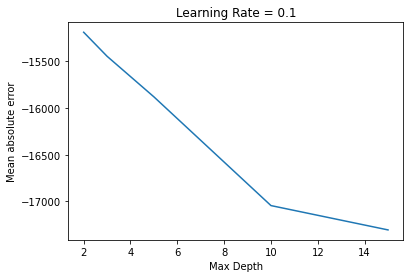

In [92]:
plt.plot(model_params_lr, model_scores_5)
plt.title("Learning Rate = 0.1")
plt.xlabel("Max Depth")
plt.ylabel("Mean absolute error")

Text(0, 0.5, 'Mean absolute error')

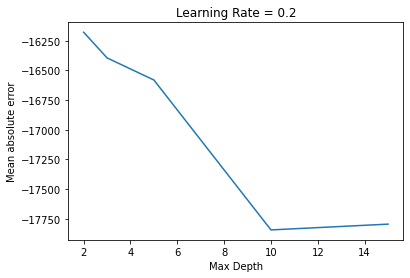

In [96]:
plt.plot(model_params_lr, model_scores_10)
plt.title("Learning Rate = 0.2")
plt.xlabel("Max Depth")
plt.ylabel("Mean absolute error")

In [97]:
y_pred = regressor.predict(X_Test_df)

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [98]:
regressor.score(x, y)

0.9827599510478134

In [99]:
##Create Sample Submission file and Submit using ANN
prediction       = pd.DataFrame(y_pred)
sub_df           = pd.read_csv('sample_submission.csv')
datasets         = pd.concat([sub_df['Id'],prediction],axis=1)
datasets.columns =['Id','SalePrice']

datasets.to_csv('sample_submission.csv',index=False)

![Cat](./screen.png)